In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob


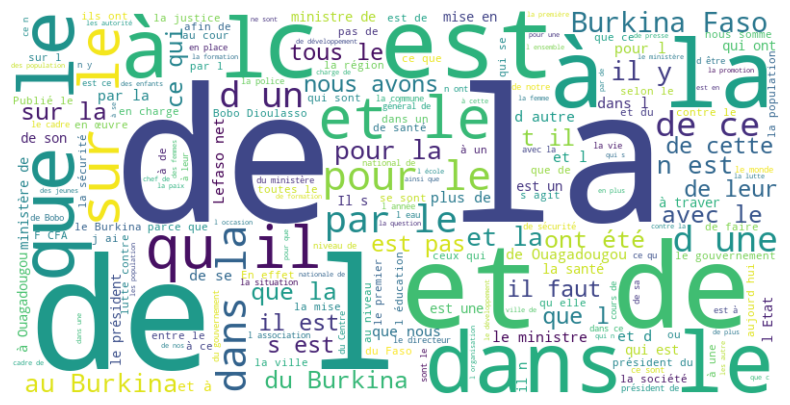

Article 1: positive
Article 2: negative
Article 3: neutral
Article 4: positive
Article 5: neutral
Article 6: neutral
Article 7: neutral
Article 8: neutral
Article 9: neutral
Article 10: neutral


In [2]:
corpus_BF = pd.read_excel("corpus/corpus_BF.xlsx", engine='openpyxl')

# Load one of the CSV files from corpus_FRESA for demonstration
articles_24 = pd.read_csv("corpus/corpus_FRESA/articles_24 Heures au BÇnin.www.24haubenin.info_.csv")

# 2. Generating a word cloud

# Combine all the texts from corpus_BF into one large string
text_BF = " ".join(article for article in corpus_BF["TXT"])

# Generate the word cloud
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text_BF)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 3. Performing sentiment analysis

# Analyze sentiment of the first 10 articles from articles_24 for demonstration
sentiments = []

for article in articles_24["text"].head(10):
    analysis = TextBlob(article)
    if analysis.sentiment.polarity > 0:
        sentiments.append("positive")
    elif analysis.sentiment.polarity == 0:
        sentiments.append("neutral")
    else:
        sentiments.append("negative")

# Display the sentiment results
for i, sentiment in enumerate(sentiments):
    print(f"Article {i + 1}: {sentiment}")

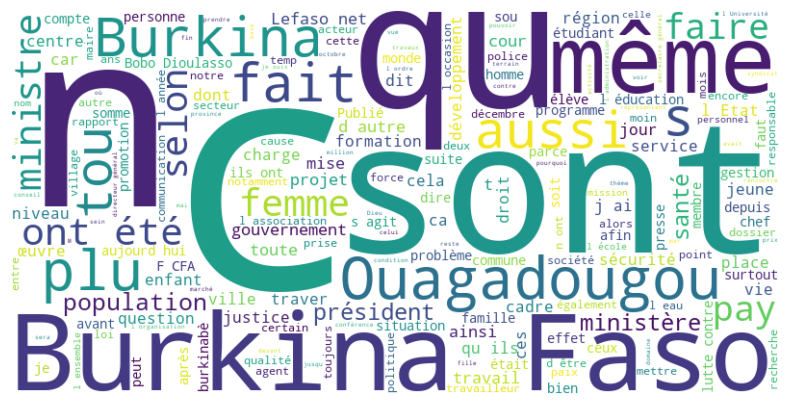

In [5]:
from wordcloud import STOPWORDS

french_stopwords = set(STOPWORDS).union(set([
    'de', 'la', 'et', 'dans', 'le', 'les', 'du', 'des', 'au', 'un', 'une', 'pour', 'que', 'est', 'en', 'à', 'sur', 'avec', 'par', 'il', 'elle', 'qui', 'ce', 'ne', 'pas', 'se', 'son', 'sa', 'ses', 'mais', 'comme', 'ou', 'quand', 'tout', 'nous', 'vous', 'leur', 'lui', 'y', 'moi', 'toi', 'elle', 'eux', 'si', 'mon', 'ma', 'mes', 'te', 'ta', 'ton', 'votre', 'nos', 'leurs', 'quel', 'quelle', 'quels', 'quelles', 'sans', 'donc'
]))

# Generate the word cloud excluding the stop words
wordcloud = WordCloud(stopwords=french_stopwords, background_color="white", width=800, height=400).generate(text_BF)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

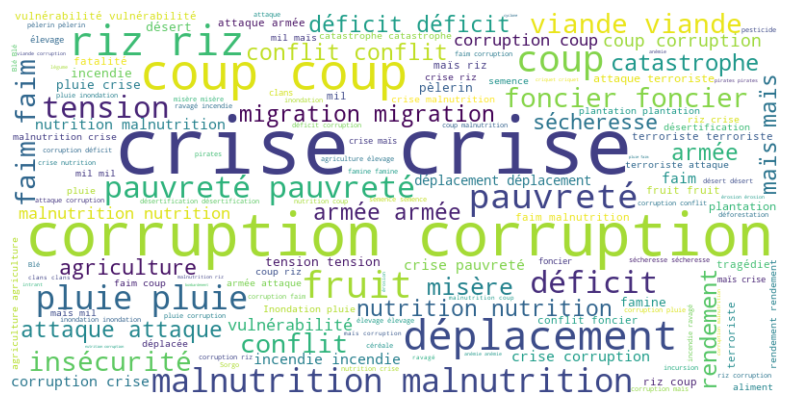

In [6]:
expert_lexicon = pd.read_excel("Lexicons_food_security/expert.xlsx", engine='openpyxl')
lexicon_terms = list(expert_lexicon['LEXG'].dropna()) + list(expert_lexicon['LEXA'].dropna()) + list(expert_lexicon['LEXC'].dropna())

# Add terms from other lexicon files as needed
# For example, from fraiberger.xlsx
fraiberger_lexicon = pd.read_excel("Lexicons_food_security/fraiberger.xlsx", engine='openpyxl')
lexicon_terms += list(fraiberger_lexicon['factor'].dropna())

# Convert to a set for faster lookup
lexicon_set = set(lexicon_terms)

# 2. Filter the Corpus

# Tokenize the text from corpus_BF
tokens_BF = text_BF.split()

# Filter tokens based on the lexicon
filtered_tokens = [token for token in tokens_BF if token.lower() in lexicon_set]

# Combine filtered tokens back into a string
filtered_text_BF = ' '.join(filtered_tokens)

# 3. Generate the Word Cloud

wordcloud = WordCloud(background_color="white", width=800, height=400).generate(filtered_text_BF)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

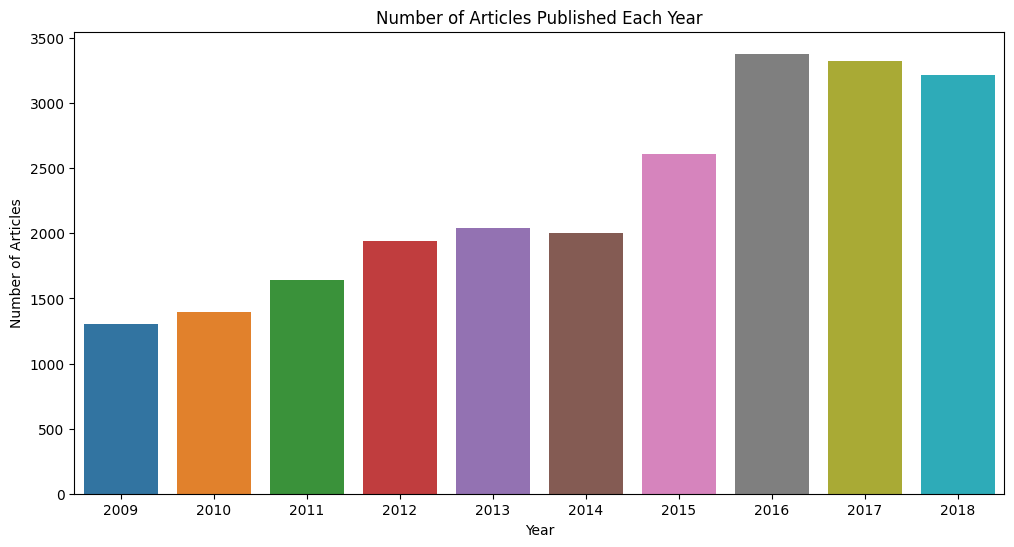

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corpus_BF = pd.read_excel("corpus/corpus_BF.xlsx", engine='openpyxl')

# Count the number of articles for each year
year_counts = corpus_BF['ANNEE'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Number of Articles Published Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()

In [11]:
keops = pd.read_excel("Lexicons_food_security/KEOPS.xlsx", engine='openpyxl')

In [21]:
concept_to_categories = {}

for index, row in keops.iterrows():
    for column in keops.columns:
        if pd.notna(row[column]):
            concept = row[column].lower()  # Convert to lowercase for easier matching
            if concept not in concept_to_categories:
                concept_to_categories[concept] = []
            concept_to_categories[concept].append(column)

def tag_article_categories(article_text):
    categories = set()
    for concept, cats in concept_to_categories.items():
        if concept in article_text.lower():  # Convert article text to lowercase for matching
            categories.update(cats)
    return list(categories)

# Apply the tagging function to each article
articles_24['Categories'] = articles_24['text'].apply(tag_article_categories)

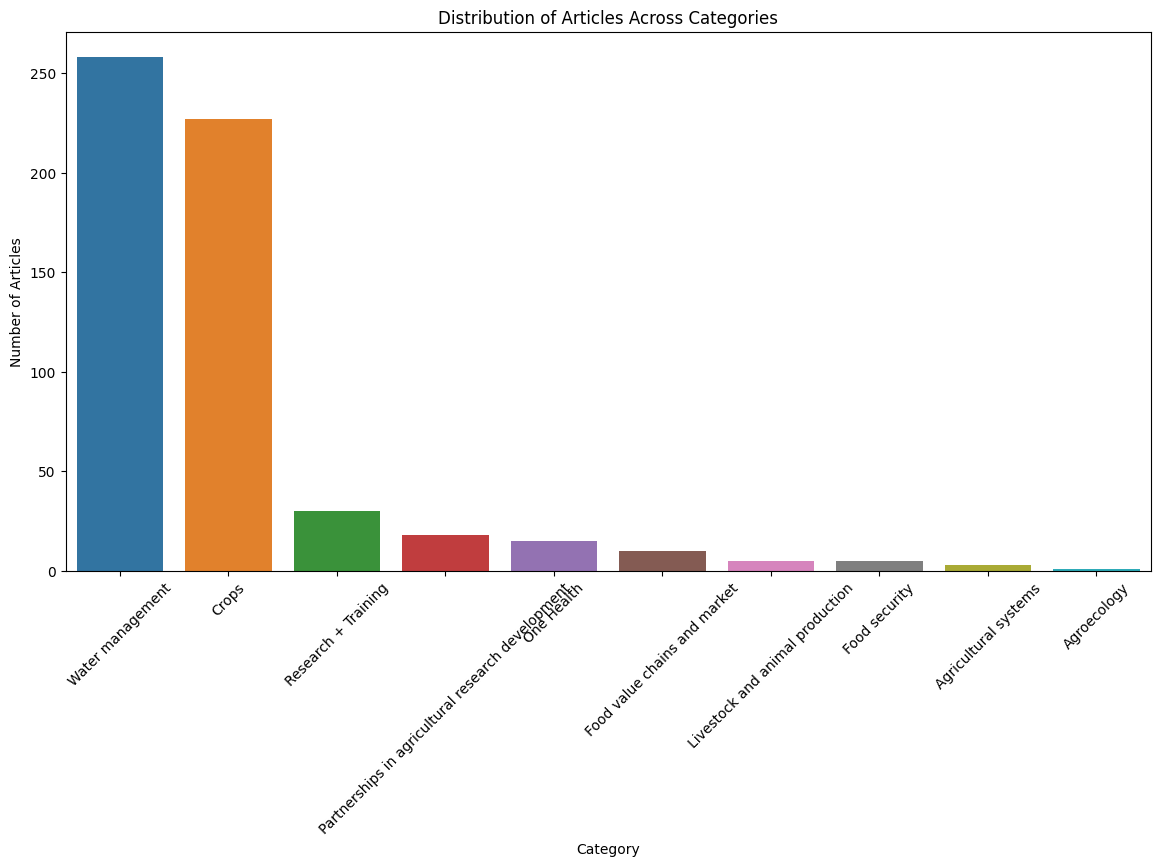

In [22]:
# Flatten the 'Categories' column and count occurrences
category_counts = articles_24.explode('Categories')['Categories'].value_counts()

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Articles Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [26]:
keops = pd.read_excel("Lexicons_food_security/KEOPS.xlsx", engine='openpyxl')

concept_to_categories = {}

for index, row in keops.iterrows():
    for column in keops.columns:
        if pd.notna(row[column]):
            concept = row[column].lower()  # Convert to lowercase for easier matching
            if concept not in concept_to_categories:
                concept_to_categories[concept] = []
            concept_to_categories[concept].append(column)

def tag_article_categories(article_text):
    categories = set()
    for concept, cats in concept_to_categories.items():
        if concept in article_text.lower():
            categories.update(cats)
    return list(categories)

# Apply the tagging function to each article
articles_24['Categories'] = articles_24['text'].apply(tag_article_categories)


In [36]:
import numpy as np
# Prepare data for radar plot
labels = keops.columns.tolist()  # Categories
values = [category_counts.get(category, 0) for category in labels]  # Counts for each category, default to 0 if not present

# Set data for radar plot
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
values = np.concatenate((values, [values[0]]))  # Close the plot
angles = np.concatenate((angles, [angles[0]]))